In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['font.size'] = 16

In [50]:
# read csv files
file_dir = '../csv_files/'
train_set = 'dips'
test_set = 'db5_test'
model = 'model_F_E_2'
num_samples = 40
num_steps = 40

df_list = []
for i in range(3):
    file_name = f'{test_set}_{model}_{num_samples}_samples_{num_steps}_steps_{train_set}_{i}'
    df = pd.read_csv(f'{file_dir}{file_name}.csv')
    df['run'] = i
    df_list.append(df)

In [51]:
def sort_df(df_list, score='energy'):
    df = pd.concat(df_list)
    if score == 'energy':
        result_df = df.copy().sort_values(by=score, ascending=True).groupby('id')
    elif score == 'iptm':
        result_df = df.copy().sort_values(by=score, ascending=False).groupby('id')
    top1 = result_df.head(1).copy()
    top5 = result_df.head(5).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top10 = result_df.head(10).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top25 = result_df.head(25).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top40 = result_df.head(40).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    best = df.sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    # merge dataframes
    top1['method'] = 'Top-1'
    top5['method'] = 'Top-5'
    top10['method'] = 'Top-10'
    top25['method'] = 'Top-25'
    best['method'] = 'Oracle'

    # merge the dataframes 
    df_merged = pd.concat([top1, top5, top10, top25, best])

    # get the order
    cols = ['Top-1', 'Top-5', 'Top-10', 'Top-25', 'Oracle']

    df_merged['method'] = pd.Categorical(df_merged['method'], categories=cols, ordered=True)

    # separate for each metric
    df_DockQ = df_merged.pivot(index='id', columns='method', values='DockQ')[cols]

    df_sr = pd.DataFrame()
    df_sr['Acceptable'] = df_DockQ[(df_DockQ >= 0.23)].count() / df_DockQ.shape[0]
    df_sr['Medium'] = df_DockQ[(df_DockQ >= 0.49)].count() / df_DockQ.shape[0]
    df_sr['High'] = df_DockQ[(df_DockQ >= 0.8)].count() / df_DockQ.shape[0]
    df_sr = df_sr.reset_index()
    return df_sr, top1, best

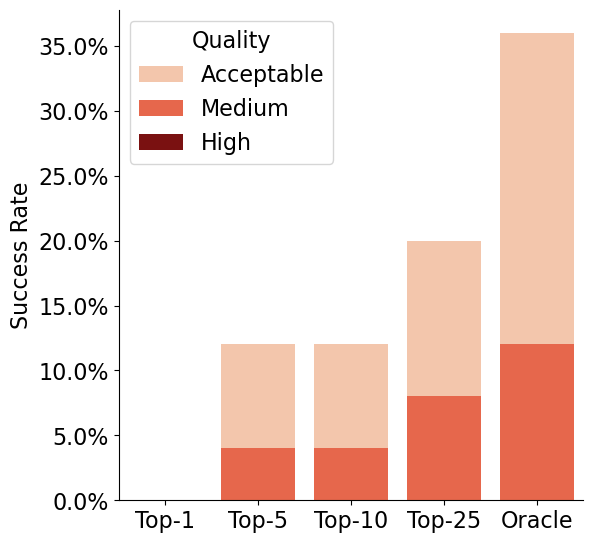

In [52]:
df_sr, top1, best = sort_df(df_list, score='energy')
melted_df = pd.melt(df_sr, id_vars='method', var_name='Quality', value_name='Success Rate')

# Define custom colors for pastel red, muted red, and dark red
custom_palette = ["#FFC3A0", "#FF5733", "#8B0000"]

g = sns.catplot(
    data=melted_df, 
    kind='bar', 
    x='method', 
    y='Success Rate', 
    hue='Quality', 
    dodge=False, 
    palette=custom_palette,
    height=6,
    aspect=1,
    legend_out=False,
) 

g.set_xlabels("")
g.ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#plt.ylim(0, 0.5)
plt.xticks(rotation=0)
#plt.savefig('DFMDock_db5_ab_ag.png', dpi=300, bbox_inches="tight")
plt.show()

In [53]:
merged_df = pd.merge(top1, best, on='id', suffixes=('_top1', '_best'))
merged_df

,id,index_top1,c_rmsd_top1,i_rmsd_top1,l_rmsd_top1,fnat_top1,DockQ_top1,energy_top1,num_clashes_top1,iptm_top1,...,c_rmsd_best,i_rmsd_best,l_rmsd_best,fnat_best,DockQ_best,energy_best,num_clashes_best,iptm_best,run_best,method_best
0,5HGG,27,11.972725,8.417758,30.528822,0.064516,0.055745,-69.284569,32,0.435630,...,3.662267,3.027810,10.366887,0.516129,0.371734,-63.521954,7,0.384328,0,Oracle
1,4POU,25,16.829338,13.230743,32.029705,0.000000,0.026161,-60.610901,8,0.395503,...,8.942006,8.195815,18.951324,0.000000,0.066629,-56.960537,2,0.408213,0,Oracle
2,2A9K,13,13.716585,13.829369,41.575481,0.000000,0.017250,-59.902332,1,0.463467,...,16.988432,9.987355,31.207281,0.000000,0.030374,-55.619202,1,0.474953,0,Oracle
3,1VFB,10,17.779663,15.084586,41.378677,0.000000,0.016760,-59.581226,23,0.384435,...,13.143694,11.936009,25.600245,0.200000,0.104948,-51.069462,5,0.506326,0,Oracle
4,1QA9,15,13.999424,11.182298,22.457695,0.000000,0.047660,-58.275124,2,0.323185,...,3.447075,2.755914,6.996504,0.750000,0.524886,-57.949444,2,0.369717,0,Oracle
5,7CEI,39,12.206775,9.699460,21.088482,0.000000,0.054371,-57.722870,9,0.293815,...,11.986197,9.517500,17.593401,0.000000,0.071161,-57.278259,8,0.331881,2,Oracle
6,1AVX,12,18.533596,9.460893,32.925198,0.000000,0.029001,-57.232735,49,0.484577,...,11.792373,10.992429,19.489666,0.000000,0.059364,-53.781178,0,0.491906,2,Oracle
7,2SNI,22,14.342153,10.008960,37.635445,0.281250,0.117250,-56.894566,27,0.424834,...,1.590489,1.469275,4.122493,0.625000,0.648305,-51.900757,0,0.421116,2,Oracle
8,5JMO,28,13.240569,17.109632,44.157074,0.000000,0.014453,-56.135979,6,0.442042,...,11.827301,13.033860,26.855686,0.000000,0.034709,-53.308598,17,0.445349,0,Oracle
9,2SIC,27,14.162774,7.880947,32.369106,0.142857,0.080775,-55.117180,25,0.396170,...,2.145116,1.561190,5.701025,0.800000,0.656582,-48.002140,6,0.399044,1,Oracle


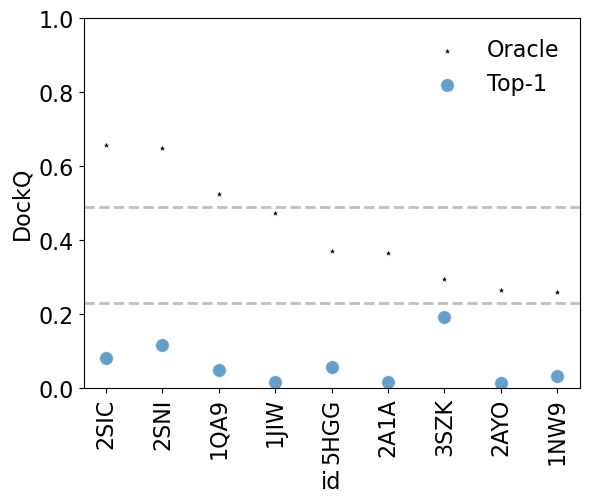

In [54]:
merged_df = merged_df.sort_values(by='DockQ_best', ascending=False)
filtered_df = merged_df[merged_df['DockQ_best'] >= 0.23]

sns.scatterplot(data=filtered_df, x='id', y='DockQ_best', label='Oracle', color='black', marker='*', s=30, alpha=1.0)
sns.scatterplot(data=filtered_df, x='id', y='DockQ_top1', label='Top-1', marker='o', s=100, alpha=0.7)
plt.axhline(y=0.23, color='grey', linestyle='--', alpha=0.5, lw=2.0)
plt.axhline(y=0.49, color='grey', linestyle='--', alpha=0.5, lw=2.0)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.legend(frameon=False)
plt.ylabel('DockQ')
plt.ylim(0, 1)
plt.show()